In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('tips')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# gen_dt = {d:idx for idx,d in enumerate(df['sex'].unique())}

In [6]:
gen_dt = {
    'Male' : 0,
    'Female' : 1
}

In [7]:
smo_dt = {d:idx for idx,d in enumerate(df['smoker'].unique())}

In [8]:
time_dt = {
    'Lunch' : 0,
    'Dinner' : 1
}

In [9]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [10]:
gen_dt

{'Male': 0, 'Female': 1}

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df['gender'] = df['sex'].map(gen_dt)
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [13]:
df['no_smoker'] = df['smoker'].map(smo_dt)
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [14]:
df['no_time'] = df['time'].map(time_dt)
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


In [15]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
gender        category
no_smoker     category
no_time       category
dtype: object

In [16]:
df[['gender','no_smoker','no_time']] = df.iloc[:,-3:].astype('int')

In [17]:
df.corr(numeric_only=True).sort_values('tip', ascending=False)

,total_bill,tip,size,gender,no_smoker,no_time
tip,0.675734,1.000000,0.489299,-0.088862,0.005929,0.121629
total_bill,1.000000,0.675734,0.598315,-0.144877,0.085721,0.183118
size,0.598315,0.489299,1.000000,-0.086195,-0.133178,0.103411
no_time,0.183118,0.121629,0.103411,-0.205231,0.054921,1.000000
no_smoker,0.085721,0.005929,-0.133178,-0.002816,1.000000,0.054921
gender,-0.144877,-0.088862,-0.086195,1.000000,-0.002816,-0.205231


<Axes: >

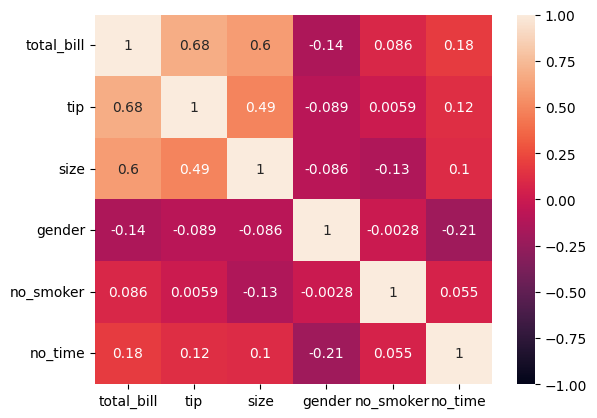

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

<Axes: >

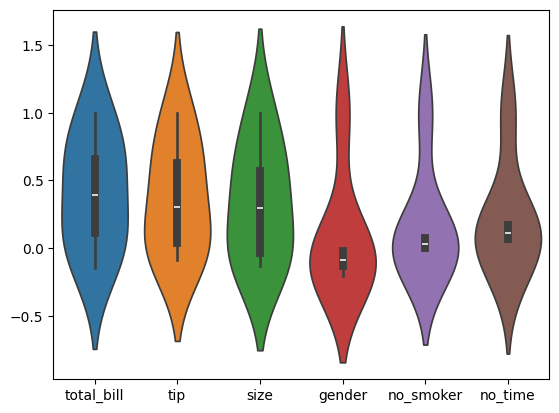

In [19]:
sns.violinplot(df.corr(numeric_only=True))

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


<Axes: xlabel='day', ylabel='total_bill'>

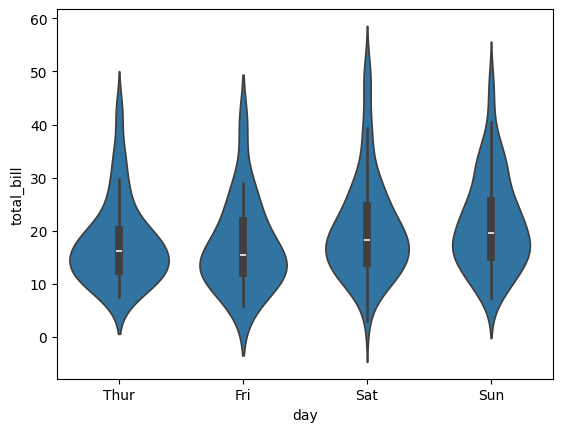

In [21]:
sns.violinplot(x='day', y='total_bill', data=df)

<Axes: xlabel='day', ylabel='tip'>

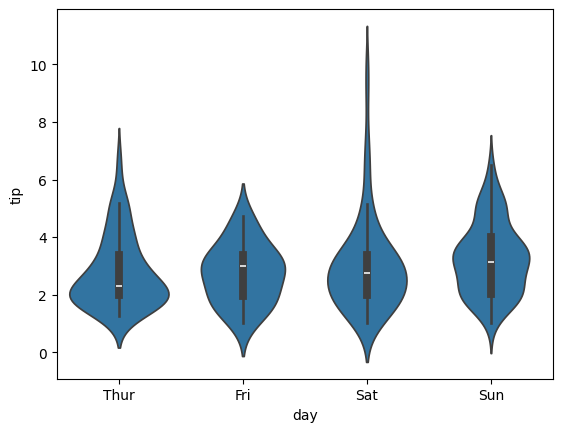

In [22]:
sns.violinplot(x='day', y='tip', data=df)

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


C:\Users\go121\AppData\Local\Temp\ipykernel_20200\131234499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='day'>

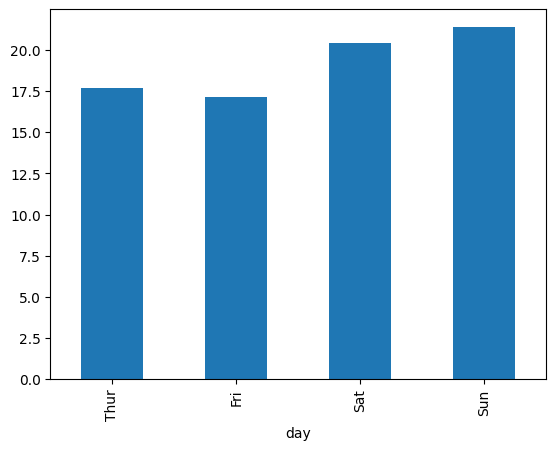

In [24]:
df.groupby('day')['total_bill'].mean().plot(kind='bar')

In [25]:
df.groupby('day')['total_bill'].mean()

C:\Users\go121\AppData\Local\Temp\ipykernel_20200\1881343769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [26]:
df.groupby('day')['total_bill'].mean()

C:\Users\go121\AppData\Local\Temp\ipykernel_20200\1881343769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

<Axes: xlabel='day', ylabel='total_bill'>

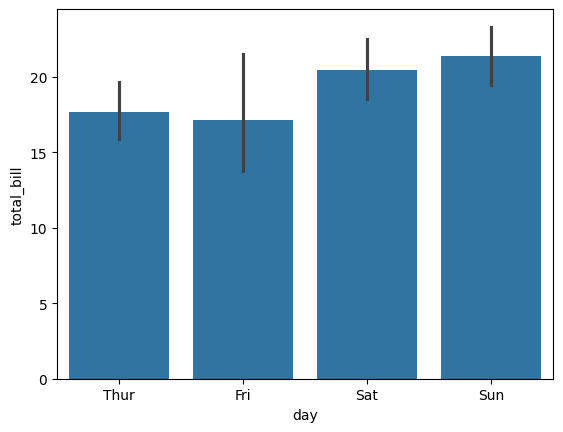

In [27]:
sns.barplot(x='day', y='total_bill', data=df)

<Axes: xlabel='day', ylabel='total_bill'>

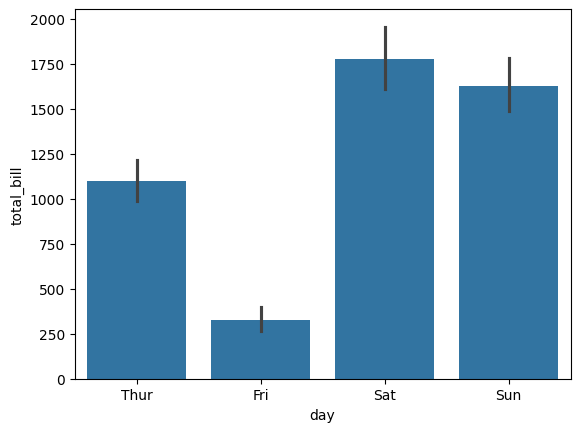

In [28]:
sns.barplot(x='day', y='total_bill', data=df, estimator='sum')

<Axes: xlabel='day', ylabel='total_bill'>

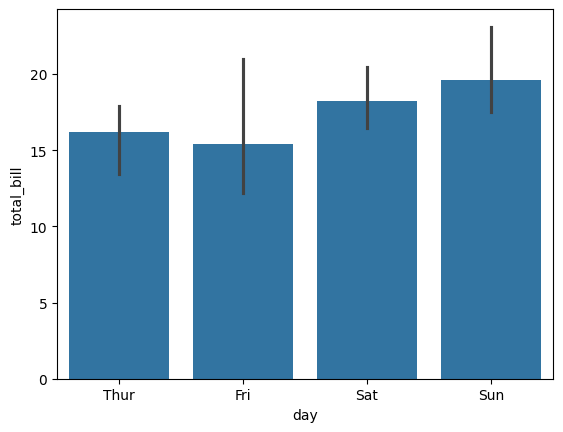

In [29]:
sns.barplot(x='day', y='total_bill', data=df, estimator='median')

<Axes: xlabel='day', ylabel='total_bill'>

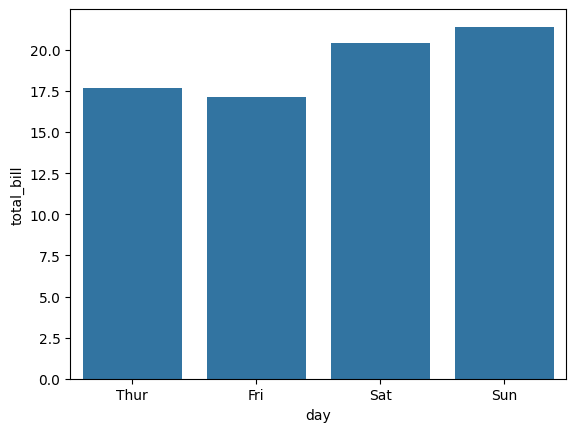

In [30]:
sns.barplot(x='day', y='total_bill', data=df, errorbar=None)

<Axes: xlabel='day', ylabel='total_bill'>

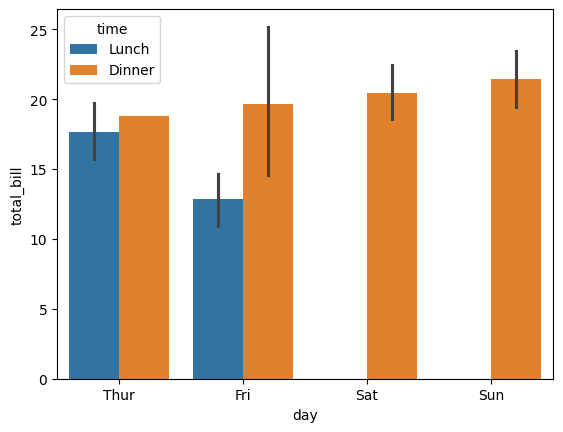

In [31]:
sns.barplot(x='day', y='total_bill', data=df, hue='time')

<Axes: xlabel='day', ylabel='total_bill'>

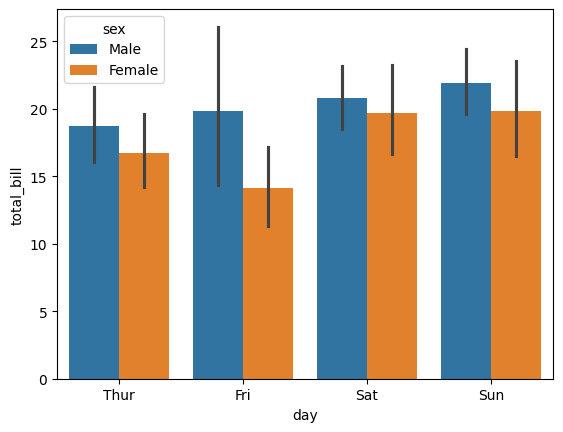

In [32]:
sns.barplot(x='day', y='total_bill', data=df, hue='sex')

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


C:\Users\go121\AppData\Local\Temp\ipykernel_20200\3269021867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day', 'sex'])['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='day,sex'>

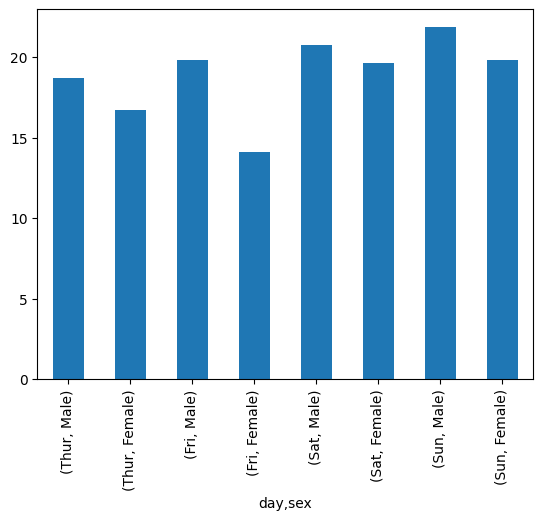

In [34]:
df.groupby(['day', 'sex'])['total_bill'].mean().plot(kind='bar')

In [35]:
df.groupby(['day', 'sex'])['total_bill'].mean().unstack()

C:\Users\go121\AppData\Local\Temp\ipykernel_20200\1027276174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day', 'sex'])['total_bill'].mean().unstack()


sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


C:\Users\go121\AppData\Local\Temp\ipykernel_20200\3492479521.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day', 'sex'])['total_bill'].mean().unstack().plot(kind='bar')


<Axes: xlabel='day'>

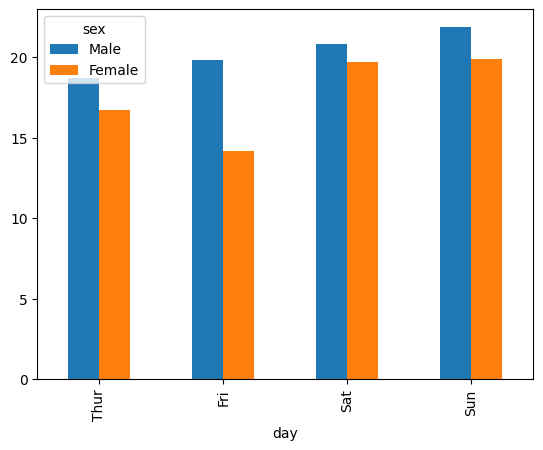

In [36]:
df.groupby(['day', 'sex'])['total_bill'].mean().unstack().plot(kind='bar')

In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


<Axes: xlabel='day', ylabel='total_bill'>

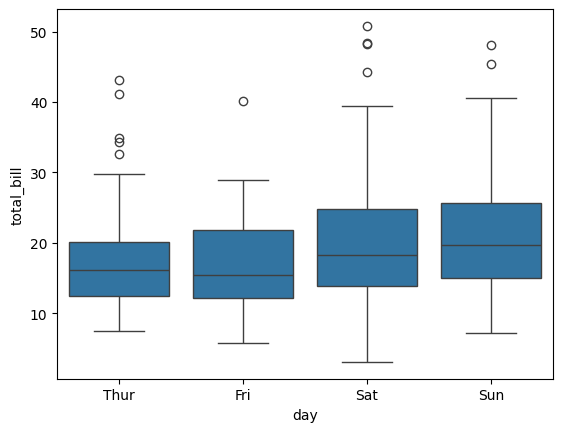

In [38]:
sns.boxplot(x='day', y='total_bill', data=df)

<Axes: xlabel='day', ylabel='total_bill'>

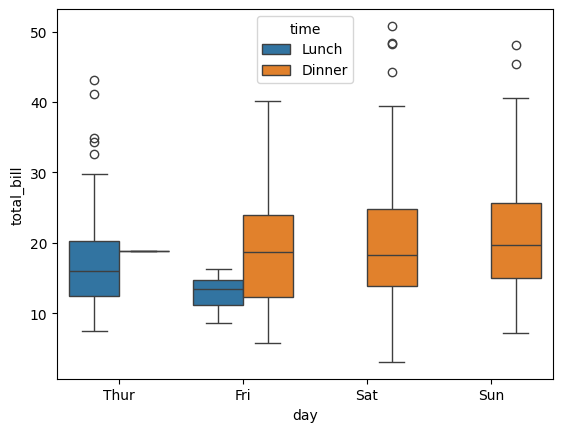

In [39]:
sns.boxplot(x='day', y='total_bill', data=df, hue='time')

<Axes: xlabel='day', ylabel='total_bill'>

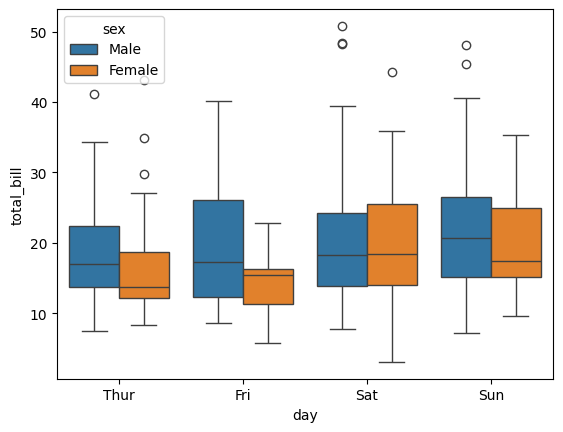

In [40]:
sns.boxplot(x='day', y='total_bill', data=df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

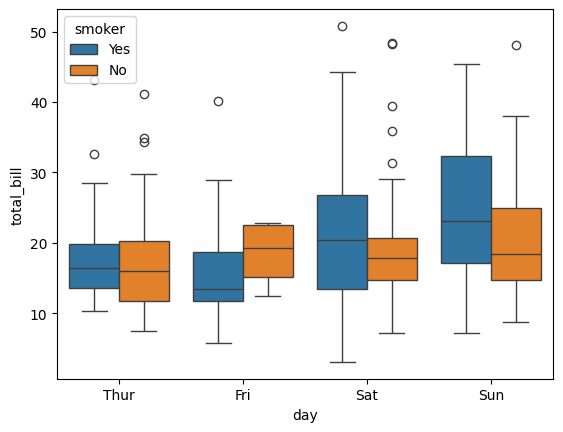

In [41]:
sns.boxplot(x='day', y='total_bill', data=df, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

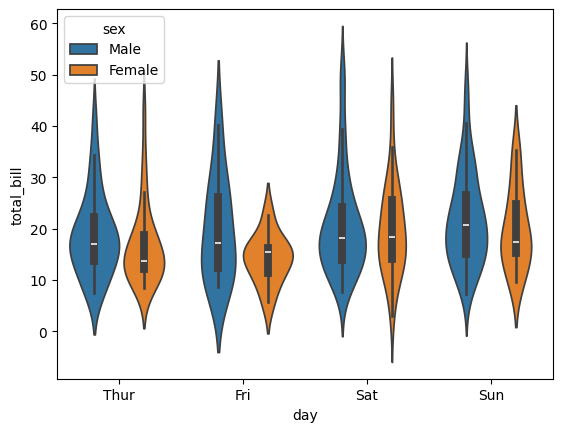

In [42]:
sns.violinplot(x='day', y='total_bill', data=df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

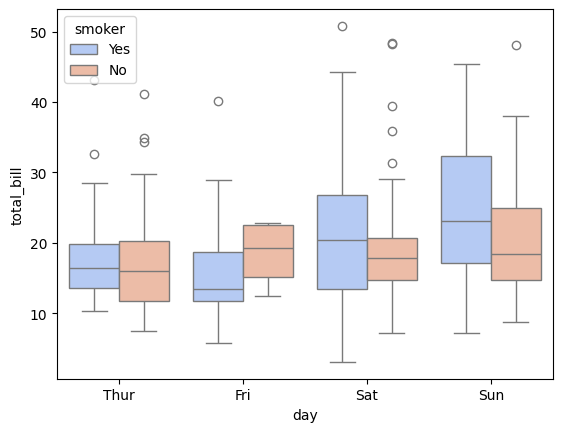

In [43]:
sns.boxplot(x='day', y='total_bill', data=df, hue='smoker', palette='coolwarm')

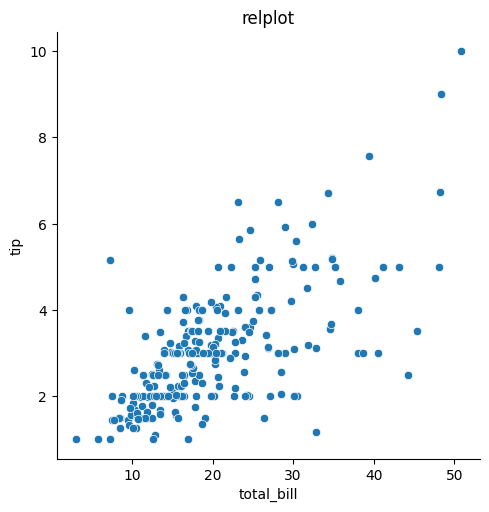

In [44]:
sns.relplot(x='total_bill', y='tip', data=df)
plt.title('relplot')
plt.show()

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,no_smoker,no_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


<Axes: >

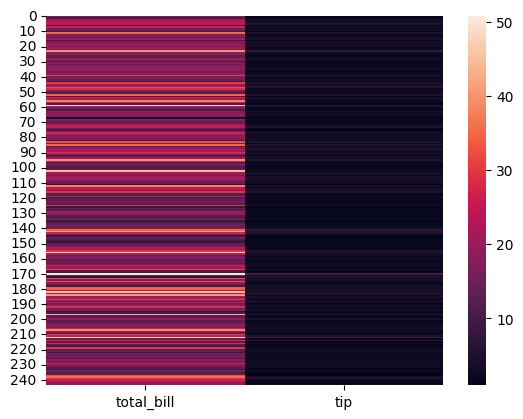

In [47]:
sns.heatmap(df.iloc[:,:2])

In [48]:
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

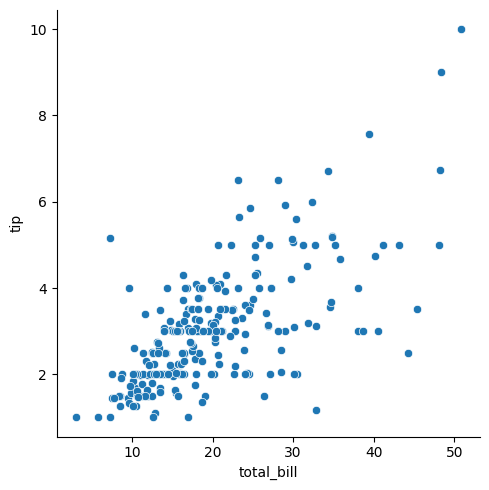

In [54]:
sns.relplot(x='total_bill', y='tip', data=df, height=5, aspect=1)